Name : Ninad Khune
PRN : 240840325036
Exam : EDA Exam

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes = True)

In [2]:
import warnings
warnings.simplefilter('ignore')

In [3]:
# Loading the Application Data and displaying rows and columns
appData = pd.read_csv('Credit_EDA_Case_Study/application_data.csv')
appData.shape


(307511, 122)

In [4]:
# Loading the Previous Application and displaying rows and columns 
PrevApp = pd.read_csv('Credit_EDA_Case_Study/previous_application.csv')
PrevApp.shape

(1670214, 37)

# **Data Cleaning on Application DataSet**

In [5]:
# summary of each numerical column of application dataset
appData.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [6]:
# Columns in Application DataSet
appData.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [7]:
# null values in application dataset
app_null = appData.isnull().sum()
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
app_null

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

In [8]:
# percentage of null values
appData_null_percent = (100*appData.isnull().sum()/len(appData)).round(2)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
appData_null_percent

SK_ID_CURR                       0.00
TARGET                           0.00
NAME_CONTRACT_TYPE               0.00
CODE_GENDER                      0.00
FLAG_OWN_CAR                     0.00
FLAG_OWN_REALTY                  0.00
CNT_CHILDREN                     0.00
AMT_INCOME_TOTAL                 0.00
AMT_CREDIT                       0.00
AMT_ANNUITY                      0.00
AMT_GOODS_PRICE                  0.09
NAME_TYPE_SUITE                  0.42
NAME_INCOME_TYPE                 0.00
NAME_EDUCATION_TYPE              0.00
NAME_FAMILY_STATUS               0.00
NAME_HOUSING_TYPE                0.00
REGION_POPULATION_RELATIVE       0.00
DAYS_BIRTH                       0.00
DAYS_EMPLOYED                    0.00
DAYS_REGISTRATION                0.00
DAYS_ID_PUBLISH                  0.00
OWN_CAR_AGE                     65.99
FLAG_MOBIL                       0.00
FLAG_EMP_PHONE                   0.00
FLAG_WORK_PHONE                  0.00
FLAG_CONT_MOBILE                 0.00
FLAG_PHONE  

In [9]:
appData.isnull().mean()

SK_ID_CURR                      0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.000000
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
AMT_ANNUITY                     0.000039
AMT_GOODS_PRICE                 0.000904
NAME_TYPE_SUITE                 0.004201
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
REGION_POPULATION_RELATIVE      0.000000
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
DAYS_REGISTRATION               0.000000
DAYS_ID_PUBLISH                 0.000000
OWN_CAR_AGE                     0.659908
FLAG_MOBIL                      0.000000
FLAG_EMP_PHONE                  0.000000
FLAG_WORK_PHONE 

In [10]:
# Removing null values more than 14%
appData = appData.iloc[:, np.where(appData.isnull().mean() <= 0.19)[0]]
len(appData.columns)

71

In [11]:
# checking again
appData.isnull().mean().round(2)

SK_ID_CURR                     0.00
TARGET                         0.00
NAME_CONTRACT_TYPE             0.00
CODE_GENDER                    0.00
FLAG_OWN_CAR                   0.00
FLAG_OWN_REALTY                0.00
CNT_CHILDREN                   0.00
AMT_INCOME_TOTAL               0.00
AMT_CREDIT                     0.00
AMT_ANNUITY                    0.00
AMT_GOODS_PRICE                0.00
NAME_TYPE_SUITE                0.00
NAME_INCOME_TYPE               0.00
NAME_EDUCATION_TYPE            0.00
NAME_FAMILY_STATUS             0.00
NAME_HOUSING_TYPE              0.00
REGION_POPULATION_RELATIVE     0.00
DAYS_BIRTH                     0.00
DAYS_EMPLOYED                  0.00
DAYS_REGISTRATION              0.00
DAYS_ID_PUBLISH                0.00
FLAG_MOBIL                     0.00
FLAG_EMP_PHONE                 0.00
FLAG_WORK_PHONE                0.00
FLAG_CONT_MOBILE               0.00
FLAG_PHONE                     0.00
FLAG_EMAIL                     0.00
CNT_FAM_MEMBERS             

This interprets Application DataSet has some null values in 'AMT_REQ_CREDIT_BUREAU' columns.

# **Data Cleaning on Previous Application DataSet**

In [12]:
# Null values in Previous Application
PrevApp_null = PrevApp.isnull().sum()
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
PrevApp_null

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

In [13]:
# Null values percent of Previous Application DataSet
PrevApp_null_percent = PrevApp.isnull().mean().round(2)
PrevApp_null_percent

SK_ID_PREV                     0.00
SK_ID_CURR                     0.00
NAME_CONTRACT_TYPE             0.00
AMT_ANNUITY                    0.22
AMT_APPLICATION                0.00
AMT_CREDIT                     0.00
AMT_DOWN_PAYMENT               0.54
AMT_GOODS_PRICE                0.23
WEEKDAY_APPR_PROCESS_START     0.00
HOUR_APPR_PROCESS_START        0.00
FLAG_LAST_APPL_PER_CONTRACT    0.00
NFLAG_LAST_APPL_IN_DAY         0.00
RATE_DOWN_PAYMENT              0.54
RATE_INTEREST_PRIMARY          1.00
RATE_INTEREST_PRIVILEGED       1.00
NAME_CASH_LOAN_PURPOSE         0.00
NAME_CONTRACT_STATUS           0.00
DAYS_DECISION                  0.00
NAME_PAYMENT_TYPE              0.00
CODE_REJECT_REASON             0.00
NAME_TYPE_SUITE                0.49
NAME_CLIENT_TYPE               0.00
NAME_GOODS_CATEGORY            0.00
NAME_PORTFOLIO                 0.00
NAME_PRODUCT_TYPE              0.00
CHANNEL_TYPE                   0.00
SELLERPLACE_AREA               0.00
NAME_SELLER_INDUSTRY        

In [14]:
len(PrevApp.columns)

37

In [15]:
# Removing null values more than 20%
PrevApp = PrevApp.iloc[:, np.where(PrevApp.isnull().mean() <= 0.20)[0]]
len(PrevApp.columns)

23

In [16]:
# check data again
PrevApp.isnull().mean().round(4)

SK_ID_PREV                     0.0000
SK_ID_CURR                     0.0000
NAME_CONTRACT_TYPE             0.0000
AMT_APPLICATION                0.0000
AMT_CREDIT                     0.0000
WEEKDAY_APPR_PROCESS_START     0.0000
HOUR_APPR_PROCESS_START        0.0000
FLAG_LAST_APPL_PER_CONTRACT    0.0000
NFLAG_LAST_APPL_IN_DAY         0.0000
NAME_CASH_LOAN_PURPOSE         0.0000
NAME_CONTRACT_STATUS           0.0000
DAYS_DECISION                  0.0000
NAME_PAYMENT_TYPE              0.0000
CODE_REJECT_REASON             0.0000
NAME_CLIENT_TYPE               0.0000
NAME_GOODS_CATEGORY            0.0000
NAME_PORTFOLIO                 0.0000
NAME_PRODUCT_TYPE              0.0000
CHANNEL_TYPE                   0.0000
SELLERPLACE_AREA               0.0000
NAME_SELLER_INDUSTRY           0.0000
NAME_YIELD_GROUP               0.0000
PRODUCT_COMBINATION            0.0002
dtype: float64

# **Assigning missing values in 'Application_DataSet'**

In [17]:
appData['NAME_TYPE_SUITE'].value_counts()

NAME_TYPE_SUITE
Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: count, dtype: int64

**Assigning NAME_TYPE_SUITE with 'Unaccompanied' as it is the most occuring value in column**

In [18]:
appData['NAME_TYPE_SUITE'].fillna(appData['NAME_TYPE_SUITE'].mode(), inplace = True)

In [19]:
# filling the numeric columns with median value

appData.AMT_REQ_CREDIT_BUREAU_YEAR.fillna(appData.AMT_REQ_CREDIT_BUREAU_YEAR.mode()[0],inplace = True) #AMT_REQ_CREDIT_BUREAU_YEAR

appData.AMT_REQ_CREDIT_BUREAU_MON.fillna(appData.AMT_REQ_CREDIT_BUREAU_MON.mode()[0],inplace = True)   #AMT_REQ_CREDIT_BUREAU_MON  

appData.AMT_REQ_CREDIT_BUREAU_WEEK.fillna(appData.AMT_REQ_CREDIT_BUREAU_WEEK.mode()[0],inplace = True) #AMT_REQ_CREDIT_BUREAU_WEEK

appData.AMT_REQ_CREDIT_BUREAU_DAY.fillna(appData.AMT_REQ_CREDIT_BUREAU_DAY.mode()[0],inplace = True)   #AMT_REQ_CREDIT_BUREAU_DAY

appData.AMT_REQ_CREDIT_BUREAU_HOUR.fillna(appData.AMT_REQ_CREDIT_BUREAU_HOUR.mode()[0],inplace = True) #AMT_REQ_CREDIT_BUREAU_HOUR

appData.AMT_REQ_CREDIT_BUREAU_QRT.fillna(appData.AMT_REQ_CREDIT_BUREAU_QRT.mode()[0],inplace = True)   #AMT_REQ_CREDIT_BUREAU_QRT

appData.NAME_TYPE_SUITE.fillna(appData.NAME_TYPE_SUITE.mode()[0],inplace = True) #NAME_TYPE_SUITE

appData.OBS_30_CNT_SOCIAL_CIRCLE.fillna( appData.OBS_30_CNT_SOCIAL_CIRCLE.mode()[0],inplace = True) #OBS_30_CNT_SOCIAL_CIRCLE

appData.DEF_30_CNT_SOCIAL_CIRCLE.fillna( appData.DEF_30_CNT_SOCIAL_CIRCLE.mode()[0],inplace = True) #DEF_30_CNT_SOCIAL_CIRCLE

appData.OBS_60_CNT_SOCIAL_CIRCLE.fillna( appData.OBS_60_CNT_SOCIAL_CIRCLE.mode()[0],inplace = True) #OBS_60_CNT_SOCIAL_CIRCLE

appData.DEF_60_CNT_SOCIAL_CIRCLE.fillna( appData.DEF_60_CNT_SOCIAL_CIRCLE.mode()[0],inplace = True) #DEF_60_CNT_SOCIAL_CIRCLE

appData.CNT_FAM_MEMBERS.fillna(appData.CNT_FAM_MEMBERS.mode() , inplace = True) #CNT_FAM_MEMBERS

appData.DAYS_LAST_PHONE_CHANGE.fillna(appData.DAYS_LAST_PHONE_CHANGE.mode()[0],inplace = True) #DAYS_LAST_PHONE_CHANGE

appData.EXT_SOURCE_2.fillna(appData.EXT_SOURCE_2.median() , inplace = True) #EXT_SOURCE_2

# appData.EXT_SOURCE_3.fillna(appData.EXT_SOURCE_3.median() , inplace = True) #EXT_SOURCE_3

In [20]:
# filling mean value of AMT_GOODS_PRICE
appData.AMT_GOODS_PRICE.fillna(appData.AMT_GOODS_PRICE.mean(), inplace = True)

In [21]:
# filling median value of AMT_ANNUITY
appData.AMT_ANNUITY.fillna(appData.AMT_ANNUITY.median(), inplace = True)

In [22]:
# Rechecking the application dataset for null values and data types.
appData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 71 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307511 non-null  float64
 10  AMT_GOODS_PRICE              307511 non-null  float64
 11  NAME_TYPE_SUITE              307511 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

**Checking the Data Types**

In [23]:
# Found out few catogrical columns are showing dtype as "object" hence changing dtypes of columns from object to "categorical"

appData['NAME_CONTRACT_TYPE'] = appData['NAME_CONTRACT_TYPE'].astype('category')
appData['CODE_GENDER'] = appData['CODE_GENDER'].astype('category')
appData['NAME_TYPE_SUITE'] = appData['NAME_TYPE_SUITE'].astype('category')
appData['NAME_INCOME_TYPE'] = appData['NAME_INCOME_TYPE'].astype('category')
appData['NAME_EDUCATION_TYPE'] = appData['NAME_EDUCATION_TYPE'].astype('category')
appData['NAME_FAMILY_STATUS'] = appData['NAME_FAMILY_STATUS'].astype('category')
appData['NAME_HOUSING_TYPE'] = appData['NAME_HOUSING_TYPE'].astype('category')
appData['WEEKDAY_APPR_PROCESS_START'] = appData['WEEKDAY_APPR_PROCESS_START'].astype('category')
appData['ORGANIZATION_TYPE'] = appData['ORGANIZATION_TYPE'].astype('category')

In [24]:
kachra = ['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','FLAG_EMAIL', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']

In [25]:
appData.drop(labels=kachra,axis=1,inplace=True)

In [26]:
appData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307511 non-null  int64   
 1   TARGET                       307511 non-null  int64   
 2   NAME_CONTRACT_TYPE           307511 non-null  category
 3   CODE_GENDER                  307511 non-null  category
 4   FLAG_OWN_CAR                 307511 non-null  object  
 5   FLAG_OWN_REALTY              307511 non-null  object  
 6   CNT_CHILDREN                 307511 non-null  int64   
 7   AMT_INCOME_TOTAL             307511 non-null  float64 
 8   AMT_CREDIT                   307511 non-null  float64 
 9   AMT_ANNUITY                  307511 non-null  float64 
 10  AMT_GOODS_PRICE              307511 non-null  float64 
 11  NAME_TYPE_SUITE              307511 non-null  category
 12  NAME_INCOME_TYPE             307511 non-null

In [27]:
# ValueError: could not convert string to float: 'Cash loans'
num = appData.select_dtypes(include=np.number)

<Axes: >

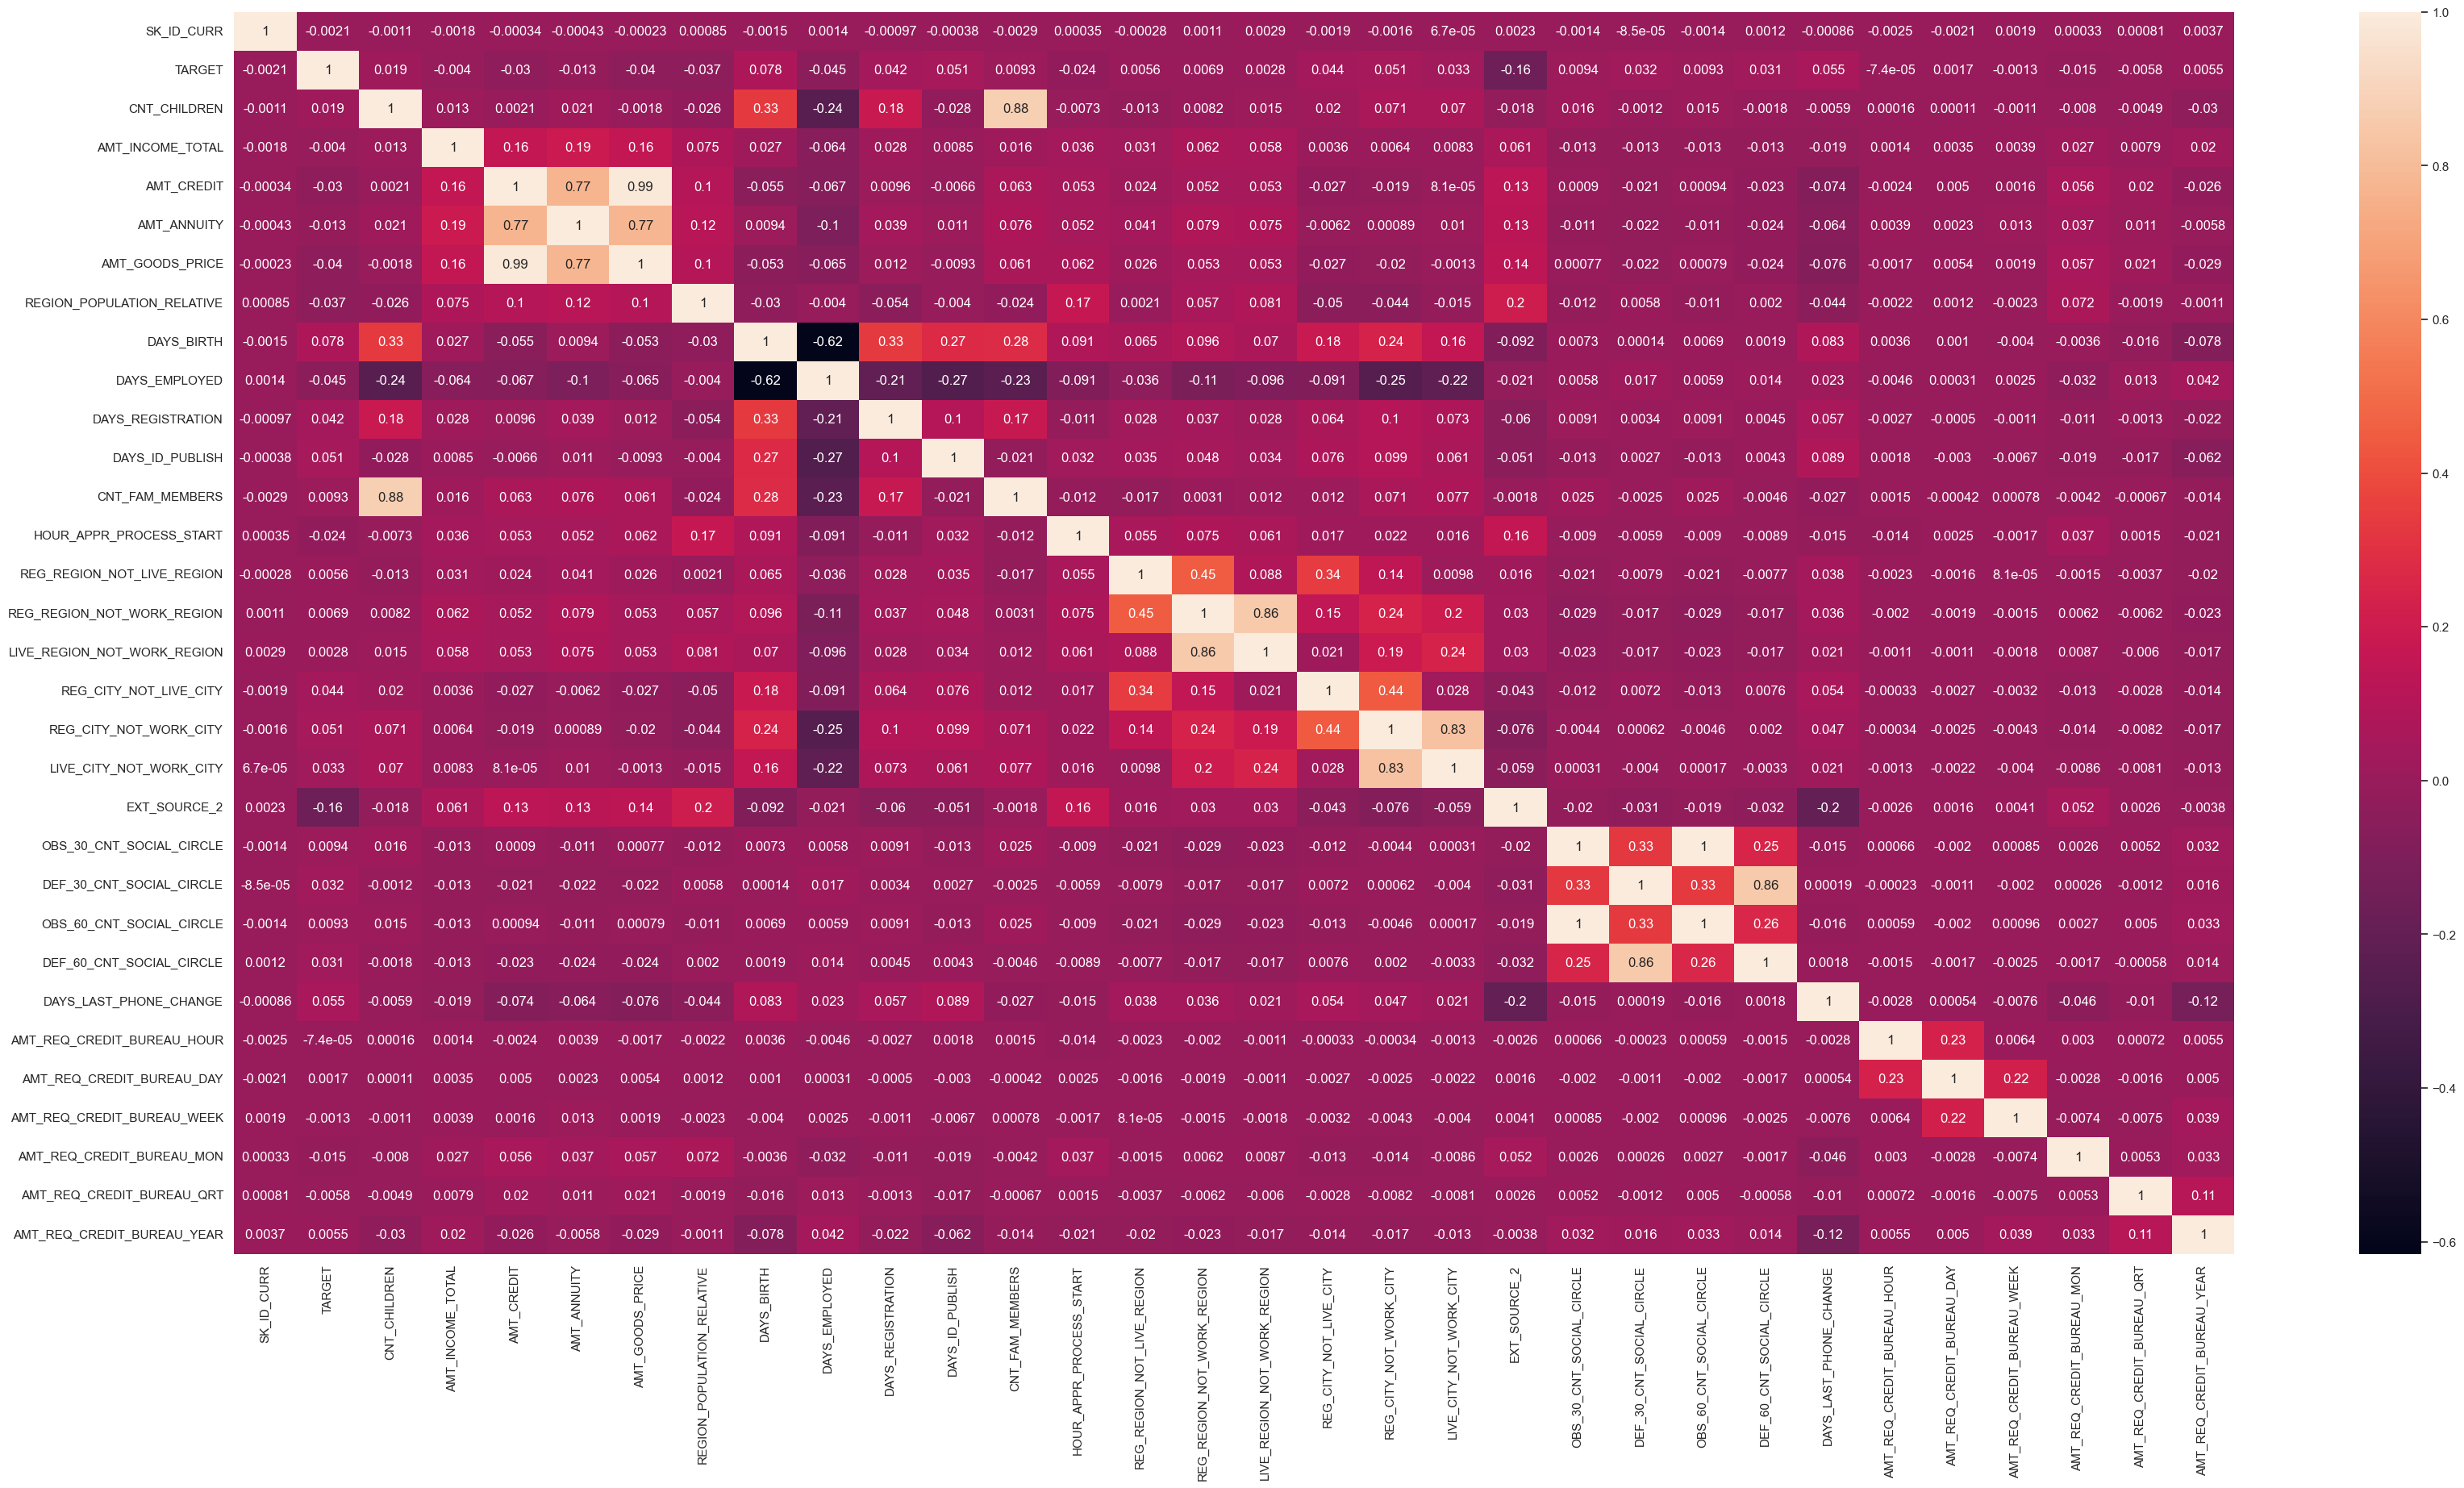

In [28]:
# Finding out the correlation of appData
plt.figure(figsize=(40, 20))
sns.heatmap(num.corr(), annot = True)

In [29]:
# Removing the columns with negative or negligible corr index.
kachra1 = ['EXT_SOURCE_2', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_HOUR']
appData.drop(labels=kachra1,axis=1,inplace=True)

In [30]:
# Checking the gender and organization column for any error.
appData.CODE_GENDER.value_counts()

CODE_GENDER
F      202448
M      105059
XNA         4
Name: count, dtype: int64

In [31]:
appData.CODE_GENDER.replace(to_replace = 'XNA', value = 'F', inplace = True)

In [32]:
appData.CODE_GENDER.value_counts()
# Now there no XNA value in CODE_GENDER column

CODE_GENDER
F    202452
M    105059
Name: count, dtype: int64

In [33]:
# checking XNA value_counts in ORGANIZATION_TYPE
appData.ORGANIZATION_TYPE.value_counts()

ORGANIZATION_TYPE
Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7      

In [34]:
# As XNA values in ORAGANIZATION_TYPE is way more (55374), we will drop them.
appData = appData.drop(appData.loc[appData['ORGANIZATION_TYPE'] == 'XNA'].index)

In [35]:
# Rechecking
appData.ORGANIZATION_TYPE.value_counts()

ORGANIZATION_TYPE
Business Entity Type 3    67992
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transport: type 3     

# **Imbalance Check**

In [36]:
# checking TARGET column
appData.TARGET.value_counts()

TARGET
0    230302
1     21835
Name: count, dtype: int64

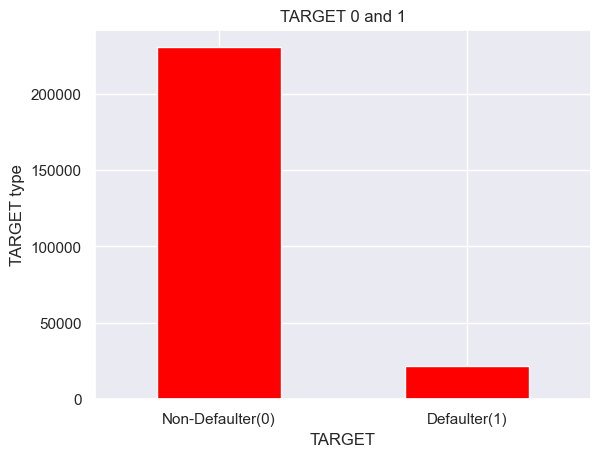

 
 1.Non-defaulter people has significantly higher observations (around 220,000+) compared to defaulter people (around 25,000). 
 2. This dataset 'TARGET' column is imbalanced. 



In [37]:
# TARGET plot
plt.title('TARGET 0 and 1')
plt.xlabel('TARGET count')
plt.ylabel('TARGET type')
appData.TARGET.value_counts().plot.bar(color = 'RED')
plt.xticks(ticks = [0,1], labels = ['Non-Defaulter(0)', 'Defaulter(1)'], rotation = 0)
plt.show()
print(" \n 1.Non-defaulter people has significantly higher observations (around 220,000+) compared to defaulter people (around 25,000). \n 2. This dataset 'TARGET' column is imbalanced. \n")

In [38]:
# Imbalance ratio for TARGET column
target0 = appData.loc[appData['TARGET'] == 0]
target1 = appData.loc[appData['TARGET'] == 1]

print(f" The Imbalance ratio is : {round((len(target0)/len(target1)), 2)}")

 The Imbalance ratio is : 10.55


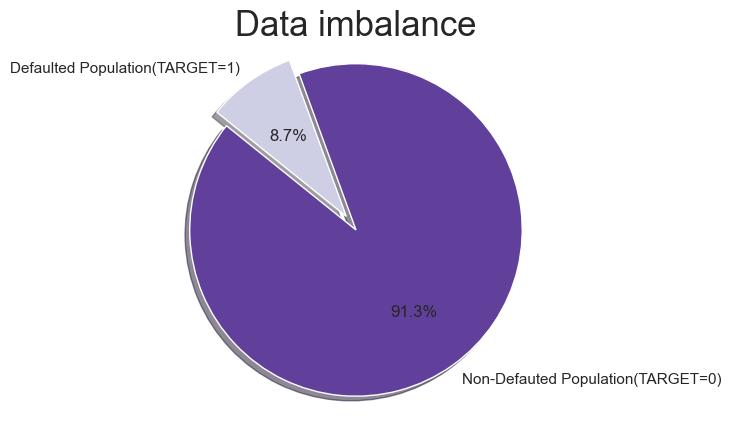

In [44]:
# making pie chart of target0 an target1
count1 = 0 
count0 = 0
for i in appData['TARGET'].values:
    if i == 1:
        count1 += 1
    else:
        count0 += 1
        
count1 = (count1/len(appData['TARGET']))*100
count0 = (count0/len(appData['TARGET']))*100

x = ['Defaulted Population(TARGET=1)','Non-Defauted Population(TARGET=0)']
y = [count1, count0]

explode = (0.1, 0)  # only "explode" the 1st slice


from matplotlib.cm import get_cmap
cmap = get_cmap('Purples')  # Use the 'Purples' colormap
colors = cmap(np.linspace(0.3, 0.8, len(y))) 


fig1, ax1 = plt.subplots()
ax1.pie(y, explode=explode, labels=x, autopct='%1.1f%%',
        shadow=True, startangle=110, colors=colors)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Data imbalance',fontsize=25)
plt.show()

# **creating bins for AMT_INCOME_TOTAL and AMT_CREDIT**

In [ ]:
# for AMT_INCOME_TOTAL

incomeBins = [0, 25000, 50000, 75000, 100000, 125000, 150000, 175000,200000, 225000, 250000, 275000, 300000, 325000, 350000,375000, 400000,9999999]
incomeSlot = ['0-25000', '25000-50000', '50000-75000', '75000-100000', 
               '100000-125000', '125000-150000', '150000-175000', 
               '175000-200000', '200000-225000', '225000-250000', 
               '250000-275000', '275000-300000', '300000-325000', 
               '325000-350000', '350000-375000', '375000-400000', 
               '400000 and above']

appData['AMT_INCOME_RANGE'] = pd.cut(appData['AMT_INCOME_TOTAL'], incomeBins, labels = incomeSlot)

In [ ]:
# for AMT_CREDIT

creditBins = [0, 150000, 200000, 250000, 300000, 350000, 400000, 450000, 500000, 550000, 600000, 650000, 700000, 750000, 800000, 850000, 900000]
creditSlot = ['0-150000', '150000-200000', '200000-250000', '250000-300000', 
               '300000-350000', '350000-400000', '400000-450000', 
               '450000-500000', '500000-550000', '550000-600000', 
               '600000-650000', '650000-700000', '700000-750000', 
               '750000-800000', '800000-850000', '850000-900000']

appData['AMT_CREDIT_RANGE'] = pd.cut(appData['AMT_CREDIT'], creditBins, labels = creditSlot )

# **ANALYSIS**

**Univariate Analysis with respect to Target Variable**

**Gender Distribution**

In [ ]:
plt.figure(figsize= (15,8))

# Subplot 1: For Target 0
plt.subplot(121)
sns.countplot(x='TARGET', hue='CODE_GENDER', data=target0, palette = 'Set2', dodge = True)
plt.title('target1 Gender Distribution')

# Subplot 2: For Target 1
plt.subplot(122)
sns.countplot(x='TARGET', hue = 'CODE_GENDER', data = target1, palette = 'Set2', dodge = True)
plt.title('Target1 Gender Distribution')

plt.show()

print(" \n Insights : \n 1. target1 shows a dominance of females (F) compared to males (M), indicating a gender imbalance risk. \n 2. Target1 has a more balanced gender distribution, reducing potential gender bias. \n ")

**People with difficulties in repaying the loan**

In [ ]:
plt.figure(figsize=(15,7))
sns.set_style('whitegrid')

plt.subplot(211)
sns.countplot(data=target1, x = 'AMT_INCOME_RANGE', hue = 'CODE_GENDER', palette = 'Greens')
plt.xticks(rotation=90)
plt.title('Distribution of Income Range Target 1')
plt.xlabel('Income Range')
plt.xticks(rotation = 45)
plt.ylabel('Gender Count')
plt.yscale('log')

plt.subplot(212)
sns.countplot(data=target0, x = 'AMT_INCOME_RANGE', hue = 'CODE_GENDER', palette = 'Greens')
plt.xticks(rotation=90)
plt.title('Distribution of Income Range Target 0 ')
plt.xlabel('Income Range')
plt.xticks(rotation = 45)
plt.ylabel('Gender Count')
plt.yscale('log')

# Adjust the space between the two plots
plt.subplots_adjust(hspace=1.0)  # Increase this value to add more space
plt.show()

print(" \n Insights : \n 1. Income inequality across gender lines in higher-income brackets. \n 2. Potential financial instability for individuals in low-income categories. \n 3. It is seen that there are more female between 100000 to 125000 income range. \n ")

**Income Type across Gender**

In [ ]:
plt.figure(figsize=(15,7))
sns.set_style('whitegrid')

plt.subplot(211)
sns.countplot(data = target0, x = 'NAME_INCOME_TYPE', hue = 'CODE_GENDER', palette = 'BuPu')
plt.xticks(rotation = 45)
plt.title('Income Type across Gender TARGET 0', fontsize = 20)
plt.xlabel('Income Type', fontsize = 20).set_visible(False)
plt.xticks(rotation = 0)
plt.ylabel('Count', fontsize = 20)
plt.yscale('log')


plt.subplot(212)
sns.countplot(data = target1, x = 'NAME_INCOME_TYPE', hue = 'CODE_GENDER', palette = 'BuPu')
plt.xticks(rotation = 45)
plt.title('Income Type across Gender TARGET 1', fontsize = 20)
plt.xlabel('Income Type', fontsize = 20)
plt.xticks(rotation = 45)
plt.ylabel('Count', fontsize = 20)
plt.yscale('log')
plt.show()


# Adjust the space between the two plots
plt.subplots_adjust(hspace=2.0)  # Increase this value to add more space

print("Insights : \n 1.  ")

**Contract Type across Genders**

In [ ]:
plt.figure(figsize=(15,10))
sns.set_style('whitegrid')

plt.subplot(211)
sns.countplot(data = target0, x = 'NAME_CONTRACT_TYPE', hue = 'CODE_GENDER', palette = 'BuPu')
plt.xticks(rotation = 45)
plt.title('Contract Type across Gender TARGET 0', fontsize = 20)
plt.xlabel('Contract Type', fontsize = 20).set_visible(False)
plt.ylabel('Count', fontsize = 20)
plt.yscale('log')

plt.subplot(212)
sns.countplot(data = target1, x = 'NAME_CONTRACT_TYPE', hue = 'CODE_GENDER', palette = 'BuPu')
plt.xticks(rotation = 45)
plt.title('Contract Type across Gender TARGET 1', fontsize = 20)
plt.xlabel('Contract Type', fontsize = 20)
plt.ylabel('Count', fontsize = 20)
plt.yscale('log')

plt.subplots_adjust(hspace=0.5)
plt.show()

**ORGANIZATION TYPE**

In [ ]:
plt.figure(figsize=[15, 30])

sns.countplot(data = target0, y = 'ORGANIZATION_TYPE', order = target0['ORGANIZATION_TYPE'].value_counts().index, palette = 'cool' )
plt.title('Organization Types Target 0')
plt.xticks(rotation=90)
plt.xscale('log')
plt.xlabel('Count')
plt.ylabel('Organization Type')

plt.show()

In [ ]:
plt.figure(figsize=[15, 30])

sns.countplot(data = target1, y = 'ORGANIZATION_TYPE', order = target1['ORGANIZATION_TYPE'].value_counts().index, palette = 'cool' )
plt.title('Organization Types Target 1')
plt.xticks(rotation=90)
plt.xscale('log')
plt.xlabel('Count')
plt.ylabel('Organization Type')

plt.show()

# **Correlation**

**TARGET 0 People**

In [ ]:
target0 = appData.select_dtypes(include=np.number)
target0Corr = target0.iloc[0: , 2: ].corr()
target0Corr

In [ ]:
plt.figure(figsize = [14,9])
sns.heatmap(target0Corr, annot = False, cmap = 'coolwarm')
plt.title('Correlation for Target 0')
plt.show()

Insights : 
1. Credit amount is inversely proportional to the date or birth, which means Credit amount is higher for low age and vice-versa.
2. Credit amount is inversely proportional to the number or children client have. means Credit amount is higher for less children count client
have and vice-versa
3. Income amount is inversely ptcvtional to the number or children client have, means more income tor less children client have and vice-
versa.
4. Less children client have in densely populated area
5. Credit amount is higher to densely populated area
6. The income is also higher in densely populated area.

**Target 1 People**

In [ ]:
target1 = appData.select_dtypes(include=np.number)
target1Corr = target1.iloc[0: , 2: ].corr()
target1Corr

In [ ]:
plt.figure(figsize = [14,9])
sns.heatmap(target1Corr, annot = False, cmap = 'twilight')
plt.title('Correlation for Target 1')
plt.show()

In [ ]:
# converting the negative values to positive values and sorting the values for target 0

corr0 = target0Corr.abs().unstack().sort_values(kind = 'quicksort').dropna()
corr0 = corr0[corr0 != 1.0]
# Top 10 correlation for Target 0 
corr0.tail(10)

In [ ]:
# Target 1 Correlation
target1Corr = target1.iloc[0:, 2:].corr()
target1Corr

In [ ]:
# converting the negative values to positive values and sorting the values for target 1

corr1 = target1Corr.abs().unstack().sort_values(kind = 'quicksort').dropna()
corr1 = corr1[corr1 != 1.0]
# Top 10 correlation for Target 1
corr1.tail(10)

# **Bivariate Analysis on Numerical Columns**

In [ ]:
# Plotting scatterplot to find any correlations and to check the trends in the dataset, in logs,

plt.figure(figsize=[16,8])

plt.subplot(1,2,1)
sns.scatterplot(data = target0, x = target0.AMT_CREDIT, y = target0.AMT_INCOME_TOTAL)
plt.title('INCOME vs CREDIT for Target-0 \n', fontsize=20)
plt.yscale('log')
plt.xlabel('\nCredit', fontsize=15)
plt.ylabel('\nIncome', fontsize=15)

plt.subplot(1,2,2)
sns.scatterplot(data = target1, x = target1.AMT_CREDIT, y = target1.AMT_INCOME_TOTAL)
plt.title('INCOME vs CREDIT for Target-1 \n', fontsize=20)
plt.yscale('log')
plt.xlabel('\nCredit', fontsize=15)
plt.ylabel('\nIncome', fontsize=15)

plt.show()

In [ ]:
# Plotting scatterplot to find any correlations and to check the trends in the dataset.


plt.figure(figsize=[16,8])

plt.subplot(1,2,1)
sns.scatterplot(x='AMT_CREDIT',y='AMT_GOODS_PRICE',data=target0)
plt.title('CREDIT vs GOODS PRICE for Target-0 \n', fontsize=20)
plt.xlabel('\nCredit', fontsize=15)
plt.ylabel('\nGoods Price', fontsize=15)

plt.subplot(1,2,2)
sns.scatterplot(x='AMT_CREDIT',y='AMT_GOODS_PRICE',data=target1)
plt.title('CREDIT vs GOODS PRICE for Target-1 \n', fontsize=20)
plt.xlabel('\nCredit', fontsize=15)
plt.ylabel('\nGoods Price', fontsize=15)

plt.show()

# **Finding Outliers**

**Univariate Analysis For Target 0**

In [ ]:
# Distribution of Income Amount,

sns.set_style('whitegrid')

sns.boxplot(data=target0, y='AMT_INCOME_TOTAL')
plt.yscale('log')
plt.yticks(fontsize=15)
plt.ylabel('Total Income', fontsize=20)
plt.title('Distribution of Income Amount \n', fontsize=20)

plt.show()

Conclusions: 
1. There seems to be an equal distribution of the Income amount of the clients.
2. Also some of the outliers present in the dataset.

In [ ]:
# Distribution of Credit Amount,

sns.set_style('whitegrid')

sns.boxplot(data=target0, y='AMT_CREDIT')
plt.yscale('log')
plt.yticks(fontsize=15)
plt.ylabel('Total Credit', fontsize=20)
plt.title('Distribution of Credit Amount \n', fontsize=20)

plt.show()

Conclusion : 
1. The first quartile is bigger than the third quartile, that means most of the client credit lies in the first quartile.
2. There seems some outliers in the Credit boxplot.

In [ ]:
# Distribution of Annuity,

sns.set_style('whitegrid')

sns.boxplot(data=target0, y='AMT_ANNUITY')
plt.yscale('log')
plt.yticks(fontsize=15)
plt.ylabel('Total Annuity', fontsize=20)
plt.title('Distribution of Annuity Amount \n', fontsize=20)

plt.show()

Conclusion: 
1. The first quartile is bigger than the third quartile.
2. There seems some outliers in the Anuuity boxplot.

**Univariate analysis of Target 1**

In [ ]:
# Distribution of Income Amount,

sns.set_style('whitegrid')

sns.boxplot(data=target1, y='AMT_INCOME_TOTAL')
plt.yscale('log')
plt.yticks(fontsize=15)
plt.ylabel('Total Income', fontsize=20)
plt.title('Distribution of Income Amount \n', fontsize=20)

plt.show()

Conclusion : 
1. There seems a significant outlier in the Income dataset.
2. Most of the income of the client lies in the third quartile.

In [ ]:
# Distribution of Credit Amount,

sns.set_style('whitegrid')

sns.boxplot(data=target1, y='AMT_CREDIT')
plt.yscale('log')
plt.yticks(fontsize=15)
plt.ylabel('Total Credit', fontsize=20)
plt.title('Distribution of Credit Amount \n', fontsize=20)

plt.show()

Conclusions: 
1. The first quartile is bigger than the third quartile, that means most of the client credit lies in the first quartile.
2. There seems some outliers in the Credit boxplot.

In [ ]:
# Distribution of Annuity,

sns.set_style('whitegrid')

sns.boxplot(data=target1, y='AMT_ANNUITY')
plt.yscale('log')
plt.yticks(fontsize=15)
plt.ylabel('Total Annuity', fontsize=20)
plt.title('Distribution of Annuity Amount \n', fontsize=20)

plt.show()

Conclusion : 
1. The first quartile is bigger than the third quartile.
2. There seems some outliers in the Anuuity boxplot.

# **Multi-Vairate analysis**

**For Target 0**

In [ ]:
# Box Plotting for the Target = 0, Credit Amount

plt.figure(figsize=[16,12])

sns.boxplot(data =target0, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS',orient='v', palette='Set1')

plt.xticks(rotation=0)
plt.xlabel('\nEducation Type', fontsize=20)
plt.ylabel('Credit Amount', fontsize=20)
plt.title('Credit amount vs Education Status (TARGET=0) \n', fontsize=20)
plt.show()

Conclusion : 
From the above box plot we can conclude that Family status of 'civil marriage', 'marriage' and 'separated' of Academic degree education are having higher number of credits than others. Also, higher education of family status of 'marriage', 'single' and 'civil marriage' are having more outliers. Civil marriage for Academic degree is having most of the credits in the third quartile.

In [ ]:
# Box Plotting for the Target = 0, Income Amount

plt.figure(figsize=[16,12])

sns.boxplot(data =target0, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS',orient='v', palette='Set1')

plt.xticks(rotation=0)
plt.xlabel('\nEducation Type', fontsize=20)
plt.ylabel('Income Amount', fontsize=20)
plt.yscale('log')
plt.title('Income amount vs Education Status (TARGET=0) \n', fontsize=20)

plt.show()

Conclusion :
From above boxplot for Education type 'Higher education' the income amount is mostly equal with family status. It does contain many outliers. Less outlier are having for Academic degree but there income amount is little higher that Higher education. Lower secondary of civil marriage family status are have less income amount than others.

**Target 1**

In [ ]:
# Box Plotting for the Target = 1, Credit Amount

plt.figure(figsize=[16,12])

sns.boxplot(data =target1, x='NAME_EDUCATION_TYPE', y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS', orient='v', palette='Set1')

plt.xticks(rotation=0)
plt.xlabel('\nEducation Type', fontsize=20)
plt.ylabel('Credit Amount', fontsize=20)
plt.title('Credit amount vs Education Status (TARGET=1) \n', fontsize=20)
plt.show()

Conclusion : From the above box plot we can say that Family status of 'civil marriage', 'marriage' and 'separated' of Academic degree education are having higher number of credits than others. Most of the outliers are from Education type 'Higher education' and 'Secondary'. Civil marriage for Academic degree is having most of the credits in the third quartile.

In [ ]:
# Box Plotting for the Target = 1, Income Amount

plt.figure(figsize=[16,12])

sns.boxplot(data =target1, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS',orient='v', palette='Set1')

plt.xticks(rotation=0)
plt.xlabel('\nEducation Type', fontsize=20)
plt.ylabel('Income Amount', fontsize=20)
plt.yscale('log')
plt.title('Income amount vs Education Status (TARGET=1) \n', fontsize=20)
plt.show()

Conclusion: 
From above boxplot for Education type 'Higher education' the income amount is mostly equal with family status. Less outlier are having for Academic degree but there income amount is little higher that Higher education. Lower secondary are have less income amount than others.

# **Previous Application DataSet**

In [ ]:
# Reading dataset
PrevApp.head()

In [ ]:
# Checking for the null values again in the dataset,

round((100*PrevApp.isnull().sum()/len(PrevApp)), 2)

In [ ]:
# Checking the NAME_CASH_LOAN_PURPOSE column for any unique data,

PrevApp.NAME_CASH_LOAN_PURPOSE.value_counts()

In [ ]:
# Removing the 'XNA' and 'XAP' column values from the column,

PrevApp = PrevApp.drop(PrevApp[PrevApp.NAME_CASH_LOAN_PURPOSE=='XNA'].index)
PrevApp = PrevApp.drop(PrevApp[PrevApp.NAME_CASH_LOAN_PURPOSE=='XAP'].index)

In [ ]:
# Rechecking the NAME_CASH_LOAN_PURPOSE for the values.

PrevApp.NAME_CASH_LOAN_PURPOSE.value_counts()

# **Merging the two Dataset**

In [ ]:
# Merging of the two datasets,

loan_merg = pd.merge(left = appData, right = PrevApp, how = 'inner', on = 'SK_ID_CURR')
loan_merg.head()

In [ ]:
# Renaming the columns in the loan_merg datasets,

loan_merg = loan_merg.rename({'NAME_CONTRACT_TYPE_' : 'NAME_CONTRACT_TYPE','AMT_CREDIT_':'AMT_CREDIT','AMT_ANNUITY_':'AMT_ANNUITY',
                         'WEEKDAY_APPR_PROCESS_START_' : 'WEEKDAY_APPR_PROCESS_START',
                         'HOUR_APPR_PROCESS_START_':'HOUR_APPR_PROCESS_START','NAME_CONTRACT_TYPEx':'NAME_CONTRACT_TYPE_PREV',
                         'AMT_CREDITx':'AMT_CREDIT_PREV','AMT_ANNUITYx':'AMT_ANNUITY_PREV',
                         'WEEKDAY_APPR_PROCESS_STARTx':'WEEKDAY_APPR_PROCESS_START_PREV',
                         'HOUR_APPR_PROCESS_STARTx':'HOUR_APPR_PROCESS_START_PREV'}, axis=1)

In [ ]:
# Removing the unwanted columns from the dataset for the ease of analysis

loan_merg.drop(['SK_ID_CURR','REG_REGION_NOT_LIVE_REGION', 
              'REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
              'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY'],axis=1,inplace=True)

**Preforming the Univariate analysis**

In [ ]:
# Plotting for the Contract Status,

plt.figure(figsize=[15,28])

sns.countplot(data = loan_merg, y= 'NAME_CASH_LOAN_PURPOSE', 
                   order=loan_merg['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'NAME_CONTRACT_STATUS',palette='viridis')

plt.title('Distribution of contract status with purposes \n', fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Count', fontsize=20)
plt.ylabel('Loan Purpose', fontsize=20)
plt.xscale('log')

plt.show()

**Performing the bivariate analysis**

In [ ]:
# Plotting for Credit amount in logarithmic scale

plt.figure(figsize=(18,10))

sns.barplot(data = loan_merg, x='NAME_CASH_LOAN_PURPOSE', hue='NAME_INCOME_TYPE', y='AMT_CREDIT_x', orient='v', palette='BuPu_r')
plt.xticks(rotation=90)
plt.ylabel('Amount Credit_Prev', fontsize=20)
plt.xlabel('Loan Purpose', fontsize=20)
plt.yscale('log')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Prev Credit amount vs Loan Purpose \n', fontsize=25)

plt.show()

Conclusion: 
1. The credit amount of Loan purposes like 'Buying a home','Buying a land','Buying a new car' and'Building a house' is higher.
2. Income type of state servants have a significant amount of credit applied
3. Money for third person or a Hobby is having less credits applied for.

In [ ]:
# Plotting for Credit amount prev vs Housing type,

plt.figure(figsize=(16,12))
plt.xticks(rotation=30)
sns.barplot(data =loan_merg, y='AMT_CREDIT_x',hue='TARGET',x='NAME_HOUSING_TYPE', palette='autumn', ci = None)
plt.title('Prev Credit amount vs Housing type \n', fontsize=25)
plt.ylabel('Amount Credit_Prev', fontsize=20)
plt.xlabel('Housing Types', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.show()

Conclusion : 
Here for Housing type, office appartment is having higher credit of target 0 and co-op apartment is having higher credit of target=1. So, we can conclude that bank should avoid giving loans to the housing type of co-op apartment as they are having difficulties in payment. Bank can focus mostly on housing type with parents or House\appartment or miuncipal appartment for successful payments.

# **Conclusion on my EDA analysis**

1. Banks should approve more loans for Office Apartments and Co-Op Apartments, as people face fewer payment difficulties with these housing types.

2. Loans for Repairs and Other purposes should also be encouraged, as they are less risky.

3. Banks should focus on giving loans to Self-Employed individuals and Business Entity Type-3, as they are reliable borrowers.

4. Working people, especially women employees, are the best group to target for loans due to their good repayment habits.
